In [21]:
library(ggplot2)
library(ggrepel)
library(RColorBrewer)

In [3]:
toBinary = function (column) {
    column = factor(column, labels = c(1))
    column = as.numeric(column)
    column[is.na(column)] = 0
    return(column)
}

In [4]:
# load data from file
# load data from file
data = read.csv("~/research_data/mozilla_voice_comparison/ppt_data.csv")
wpm = read.csv("~/research_data/mozilla_voice_comparison/voice_metadata.csv")

data = as.data.frame(lapply(data, function (x) if (is.factor(x)) factor(x) else x))

In [5]:
data$voice.easy = toBinary(data$voice.easy)
data$voice.monotone = abs(toBinary(data$voice.monotone) - 1)
data$voice.natural = toBinary(data$voice.natural)
data$voice.no_emotion = abs(toBinary(data$voice.no_emotion) -1)
data$voice.focus = toBinary(data$voice.focus)

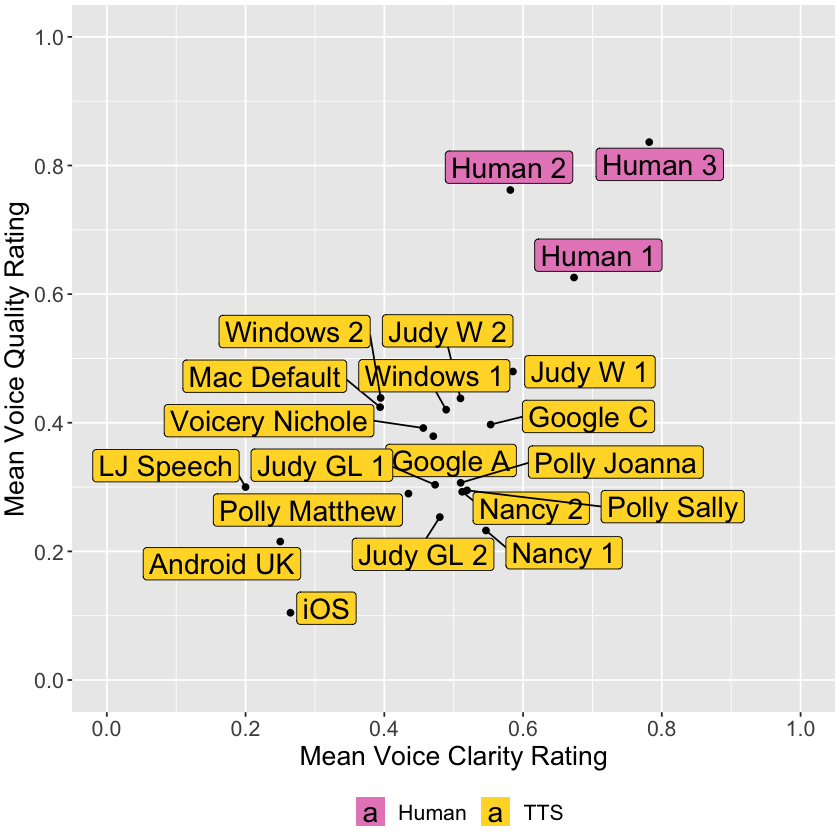

In [41]:
data$voice.factor.understand = rowMeans(data[c('voice.easy','voice.focus')])
data$voice.factor.quality = rowMeans(data[c('voice.natural','voice.monotone','voice.no_emotion')])
temp = merge(aggregate(voice.factor.understand ~ voice, data=data, FUN = "mean"),aggregate(voice.factor.quality ~ voice, data=data, FUN = "mean"),by='voice')
temp = merge(temp,wpm,by.x='voice',by.y='Voice')

ggplot(temp, aes(x = voice.factor.understand, y = voice.factor.quality, geom_text = Voice.Table.Name)) +
  geom_point() + 
  labs(x = "Mean Voice Clarity Rating", y = "Mean Voice Quality Rating") +
  geom_label_repel(aes(label=Voice.Table.Name, fill=Type), size=6) + 
  #facet_wrap( ~ Var2, labeller = as_labeller(c("Good","Poor"))) +
  #theme_classic() + 
  theme(plot.margin=unit(c(.1,.1,.1,.1),"cm"),
        text = element_text(size=16),
        #axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        #axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = element_blank())) +
  scale_fill_manual(values = c("#E78AC3",'#FFD92F')) +
  #scale_colour_brewer(palette = "PRGn") + 
  scale_y_continuous(limits=c(0,1),breaks=seq(0,1,.2)) +
  scale_x_continuous(limits=c(0,1),breaks=seq(0,1,.2))

ggsave("~/Desktop/clarity_vs_quality_9-12-19.pdf",height=7,width=7)

In [24]:
brewer.pal(n = 8, name = "Set2")

[1] "#66C2A5" "#FC8D62" "#8DA0CB" "#E78AC3" "#A6D854" "#FFD92F" "#E5C494"
[8] "#B3B3B3"